# Video: Quadcopters Gone Wild

This video shows the effects a quadcopter trying to maintain position with an incorrect model.

Script:
* An explicit assumption that we've made in our analysis of linear quadratic regulators is that the model of the system is known beforehand.
* This is a separate problem from measuring the current state of the system which keeps changing.
* If our model is wrong, we may not be able to compensate for errors in the state measurement.
* Let's see how it is with the quadcopter control problem.

In [ ]:
%pip install -q control

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import control

Script:
* I'll be using the Python `control` module again.

In [ ]:
A_truth = np.array([[1, 1], [0, 1]])
A_truth

array([[1, 1],
       [0, 1]])

In [ ]:
B_truth = np.array([[0], [1]])
B_truth

array([[0],
       [1]])

Script:
* I'll be making two copies of the variables for the linear dynamics.
* The linear dynamics represented by the A and B matrices are the model that we need to estimate for the linear quadratic regulator.
* A_truth and B_truth will be the true dynamics of the system.

In [ ]:
np.random.seed(704)
A_estimated = A_truth + 0.2 * np.random.randn(2, 2)
B_estimated = B_truth + 0.2 * np.random.randn(2, 1)

A_estimated, B_estimated

(array([[ 1.0553369 ,  0.97176068],
        [-0.03976916,  0.60547745]]),
 array([[-0.00101913],
        [ 0.85581268]]))

Script:
* A_estimated and B_estimated will be our estimated model.
* I just added some Gaussian noise to each parameter.

In [ ]:
Q = np.array([[1, 0], [0, 1]])
R = np.array([[1]])

Script:
* Our cost functions won't have any estimation issues since we just choose our cost functions based on how we want to shape the solution.

In [ ]:
x_0 = np.array([[-100], [0]])
x_0

array([[-100],
       [   0]])

Script:
* Like the previous video, the quadcopter will start at -100 and need to take off and fly to the set point.

In [ ]:
K_truth, _, _ = control.dlqr(A_truth, B_truth, Q, R)
K_truth

array([[0.42208244, 1.24392885]])

Script:
* K_truth is the matrix for optimal action selection knowing the true dynamics.

In [ ]:
K_estimated, _, _ = control.dlqr(A_estimated, B_estimated, Q, R)
K_estimated

array([[0.53814926, 1.06083583]])

Script:
* K_estimated is the matrix that we computed from the estimated dynamics.
* In comparison with K_truth, the second matrix reacts more to the vertical position and less to the velocity.
* We will see what impact that has shortly.

In [ ]:
t_max = 20

X_truth = [x_0]
X_estimated = [x_0]

ts = np.arange(0, t_max+1)
for t in range(1, t_max+1):
    X_truth.append(A_truth @ X_truth[t-1] + B_truth @ -K_truth @ X_truth[t-1])
    X_estimated.append(A_truth @ X_estimated[t-1] + B_truth @ -K_estimated @ X_estimated[t-1])

X_truth = np.concat(X_truth, axis=1)
X_estimated = np.concat(X_estimated, axis=1)

Script:
* This simulation tracks two trajectories, one using K_truth and one using K_estimated.
* One thing to note here is that the state changes are always calculated with the true dynamics even while the actions may be computed with the estimated dynamics.
* How do these trajectories look?

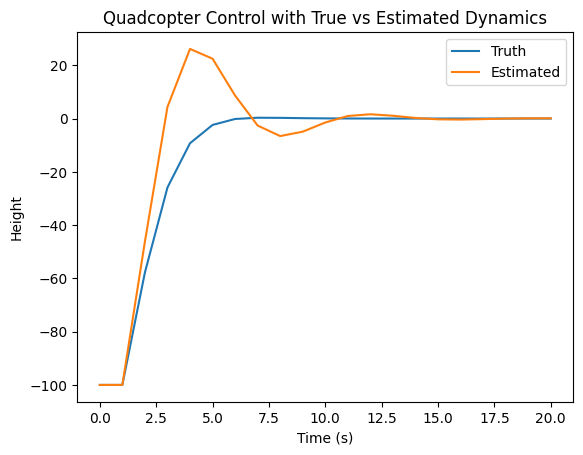

In [ ]:
plt.plot(ts, X_truth[0, :], label='Truth')
plt.plot(ts, X_estimated[0, :], label='Estimated')
plt.legend()
plt.title("Quadcopter Control with True vs Estimated Dynamics")
plt.xlabel('Time (s)')
plt.ylabel('Height')
plt.show()

Script:
* The trajectory based on estimated dynamics overshot by a lot, and then oscillated a bit before converging to the set point.
* That initial reaction was a bit predictable since we noted that it overreacted to the position and underreacted to velocity.
* This case was not too bad though - despite overshooting, it was able to stabilize at the set point.

Script: (faculty on screen)
* Linear quadratic regulators are a powerful control technique, but they need good models for good control.